# Title of the Project

# Optimize the power consumption of Zone 1 based on various environmental and metereological factors in Wellington,New-Zealand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\abhij\Downloads\data.csv")  
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


# Data Preprocessing 

In [3]:
# Standardize column names (remove spaces & fix inconsistencies)
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [4]:
# Drop unnecessary columns (modify based on actual dataset structure)
df = df.drop(columns=['S_no'], errors='ignore')


In [5]:
df.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Air_Quality_Index_(PM),Cloudiness,Power_Consumption_in_A_Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [6]:
# getting the shape of the dataset
df.shape

(52583, 8)

In [7]:
# Checking the unique values of columns
df.nunique()

Temperature                     3438
Humidity                        4444
Wind_Speed                       549
general_diffuse_flows          10497
diffuse_flows                  10449
Air_Quality_Index_(PM)            10
Cloudiness                         2
Power_Consumption_in_A_Zone    27760
dtype: int64

# Converting numerical columns stored as objects to float

In [8]:
# Clean the 'Temperature' column by removing non-numeric characters
df['Temperature'] = df['Temperature'].str.replace(r'[^\d.]+', '', regex=True)
# Convert to float
df['Temperature'] = df['Temperature'].astype(float)

In [9]:
# Clean the 'Humidity' column by removing non-numeric characters
df['Humidity'] = df['Humidity'].str.replace(r'[^\d.]+', '', regex=True)

# Convert to float
df['Humidity'] = df['Humidity'].astype(float)

In [10]:
# Clean the 'Wind_Speed' column by removing non-numeric characters
df['Wind_Speed'] = df['Wind_Speed'].str.replace(r'[^\d.]+', '', regex=True)

# Convert to float
df['Wind_Speed'] = df['Wind_Speed'].astype(float)

In [11]:
# getting info on the columns of the df after converting object type into float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature                  52263 non-null  float64
 1   Humidity                     52558 non-null  float64
 2   Wind_Speed                   52512 non-null  float64
 3   general_diffuse_flows        52275 non-null  float64
 4   diffuse_flows                52568 non-null  float64
 5   Air_Quality_Index_(PM)       52565 non-null  float64
 6   Cloudiness                   52583 non-null  int64  
 7   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [12]:
# Checking the missing values
df.isnull().sum()

Temperature                    320
Humidity                        25
Wind_Speed                      71
general_diffuse_flows          308
diffuse_flows                   15
Air_Quality_Index_(PM)          18
Cloudiness                       0
Power_Consumption_in_A_Zone      0
dtype: int64

# Handling missing values of different columns with median

In [13]:
# filling missing values of different columns with median
columns_to_fill = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows', 'Cloudiness']

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [14]:
# getting statistical descriptions of the df
df.describe()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Air_Quality_Index_(PM),Cloudiness,Power_Consumption_in_A_Zone
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52565.000000,52583.000000,52583.000000
mean,18.827339,68.286530,1.953436,181.923162,74.852230,154.499191,0.009338,31061.821779
std,5.795577,15.541513,2.347970,264.143797,124.072864,2.871553,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.450000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.885000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.870000,81.400000,4.915000,317.000000,100.450000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,8.500000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [15]:
# Checking the duplicate values
df.duplicated().sum()

0

In [16]:
df.corr()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Air_Quality_Index_(PM),Cloudiness,Power_Consumption_in_A_Zone
Temperature,1.000000,-0.459093,0.475023,0.459984,0.195879,-0.002650,-0.089640,0.558778
Humidity,-0.459093,1.000000,-0.136930,-0.468090,-0.257543,0.003636,0.013553,-0.230259
Wind_Speed,0.475023,-0.136930,1.000000,0.135859,0.000184,0.001046,-0.071522,0.206633
general_diffuse_flows,0.459984,-0.468090,0.135859,1.000000,0.564892,-0.001610,-0.021995,0.209634
diffuse_flows,0.195879,-0.257543,0.000184,0.564892,1.000000,-0.001986,-0.030141,0.062676
Air_Quality_Index_(PM),-0.002650,0.003636,0.001046,-0.001610,-0.001986,1.000000,-0.005792,-0.001039
Cloudiness,-0.089640,0.013553,-0.071522,-0.021995,-0.030141,-0.005792,1.000000,-0.120694
Power_Consumption_in_A_Zone,0.558778,-0.230259,0.206633,0.209634,0.062676,-0.001039,-0.120694,1.000000


In [17]:
df.corr()['Power_Consumption_in_A_Zone']

Temperature                    0.558778
Humidity                      -0.230259
Wind_Speed                     0.206633
general_diffuse_flows          0.209634
diffuse_flows                  0.062676
Air_Quality_Index_(PM)        -0.001039
Cloudiness                    -0.120694
Power_Consumption_in_A_Zone    1.000000
Name: Power_Consumption_in_A_Zone, dtype: float64

# Spliting dataset into the features

In [18]:
# dropping 'Air_Quality_Index_(PM)' column
df1 = df.drop(['Air_Quality_Index_(PM)'],axis=1,inplace=True)

In [19]:
df1=df

In [20]:
df1.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Cloudiness,Power_Consumption_in_A_Zone
0,6.559,73.8,0.083,0.051,0.119,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,1,27335.69620


In [21]:
# getting info on the columns of the df after removing 'Air_Quality_Index_(PM)' column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature                  52583 non-null  float64
 1   Humidity                     52583 non-null  float64
 2   Wind_Speed                   52583 non-null  float64
 3   general_diffuse_flows        52583 non-null  float64
 4   diffuse_flows                52583 non-null  float64
 5   Cloudiness                   52583 non-null  int64  
 6   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.8 MB


# Exploratory Data Analysis(EDA)

<Axes: >

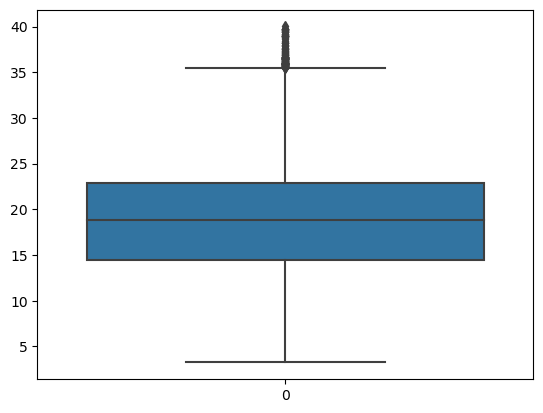

In [22]:
sns.boxplot(df1['Temperature'])

<Axes: >

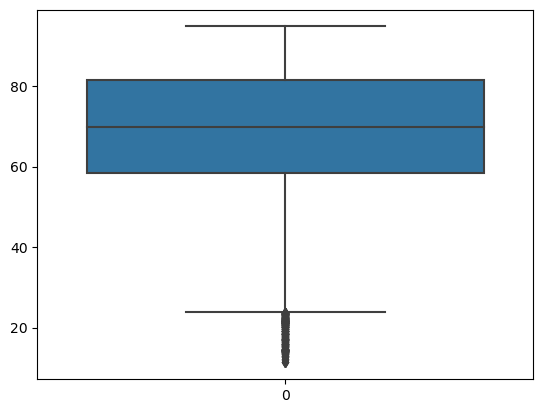

In [23]:
sns.boxplot(df1['Humidity'])

<Axes: >

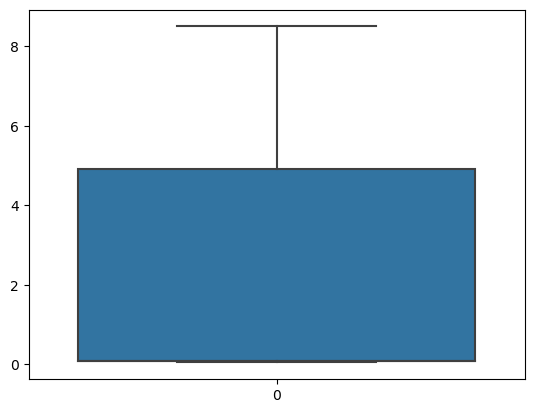

In [24]:
sns.boxplot(df1['Wind_Speed'])

<Axes: >

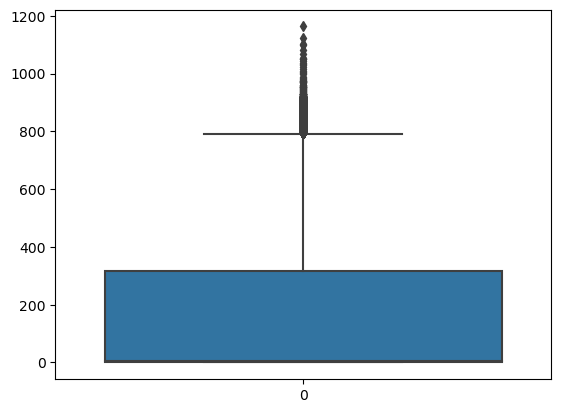

In [25]:
sns.boxplot(df1['general_diffuse_flows'])

<Axes: >

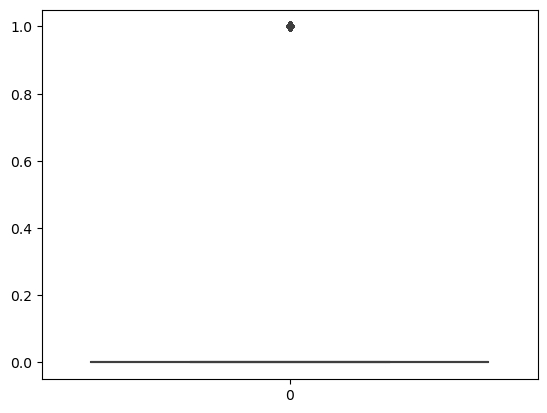

In [26]:
sns.boxplot(df1['Cloudiness'])

In [27]:
print(df1['Temperature'].skew())
print(df1['Humidity'].skew())
print(df1['Wind_Speed'].skew())
print(df1['general_diffuse_flows'].skew())
print(df1['diffuse_flows'].skew())
print(df1['Cloudiness'].skew())

0.1943951557186108
-0.6275805899944168
0.4688961388699084
1.3138833806411059
2.4613248239612293
10.20338432318343


# Handling Outlier with IQR technique

In [28]:
# Sample data with multiple features
df2 = pd.DataFrame(df1)

# Function to cap values based on IQR
def cap_values(df1, columns):
    capped_df1 = df1.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in columns:
        # Calculate the IQR
        percentile25 = capped_df1[col].quantile(0.25)
        percentile75 = capped_df1[col].quantile(0.75)
        IQR = percentile75 - percentile25

        # Calculate upper and lower limits
        upper_limit = percentile75 + 1.5 * IQR
        lower_limit = percentile25 - 1.5 * IQR

        # Capping the values
        capped_df1[col] = np.where(capped_df1[col] > upper_limit, upper_limit,
                                   np.where(capped_df1[col] < lower_limit, lower_limit, capped_df1[col]))
    return capped_df1

# Specify the columns to cap
columns_to_cap = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows', 'Cloudiness']

# Apply the capping function
new_df_cap1 = cap_values(df2, columns_to_cap)

# Display the capped DataFrame
print(new_df_cap1)


       Temperature  Humidity  Wind_Speed  general_diffuse_flows  \
0            6.559     73.80       0.083                  0.051   
1            6.414     74.50       0.083                  0.070   
2            6.313     74.50       0.080                  0.062   
3            6.121     75.00       0.083                  0.091   
4            5.921     75.70       0.081                  0.048   
...            ...       ...         ...                    ...   
52578       18.820     75.60       0.094                436.200   
52579       18.820     73.50       0.089                451.600   
52580       18.820     70.10       0.085                466.400   
52581       18.820     67.75       0.086                477.000   
52582       18.820     66.24       0.088                485.700   

       diffuse_flows  Cloudiness  Power_Consumption_in_A_Zone  
0              0.119         0.0                  34055.69620  
1              0.085         0.0                  29814.68354  
2  

In [29]:
new_df_cap1.describe()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Cloudiness,Power_Consumption_in_A_Zone
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.0,52583.000000
mean,18.823179,68.313360,1.953436,179.079258,61.905300,0.0,31061.821779
std,5.782653,15.458215,2.347970,256.982396,84.724407,0.0,8021.057455
min,3.247000,23.750000,0.050000,0.004000,0.011000,0.0,9457.750760
25%,14.450000,58.340000,0.078000,0.062000,0.122000,0.0,24738.858990
50%,18.820000,69.885000,0.086000,5.226000,4.412000,0.0,31189.787230
75%,22.870000,81.400000,4.915000,317.000000,100.450000,0.0,36721.582445
max,35.500000,94.800000,8.500000,792.407000,250.942000,0.0,52204.395120


In [30]:
df3=new_df_cap1

In [31]:
new_df_cap1.shape

(52583, 7)

In [32]:
df3.shape

(52583, 7)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

# handling skewness

In [34]:
trf = FunctionTransformer(func=np.log1p)

In [35]:
columns_to_transform = ['Temperature', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows', 'Cloudiness']

# Apply log transformation using np.log1p
df[columns_to_transform] = df[columns_to_transform].apply(np.log1p)

In [36]:
column_to_transform = ['Humidity']

# Apply log transformation using np.log1p
df[column_to_transform] = df[column_to_transform].apply(np.square)

In [37]:
print(df['Temperature'].skew())
print(df['Humidity'].skew())
print(df['Wind_Speed'].skew())
print(df['general_diffuse_flows'].skew())
print(df['diffuse_flows'].skew())
print(df['Cloudiness'].skew())

-0.6358157848061272
-0.1360899749486772
0.46218802059858843
0.2070602430281918
0.2240576249922345
10.203384323183442


In [38]:
# splitting dataset into the feature
X = df1.drop(['Power_Consumption_in_A_Zone'],axis=1)
Y = df1['Power_Consumption_in_A_Zone']

In [39]:
X.shape

(52583, 6)

In [40]:
Y.shape

(52583,)

In [41]:
# spliting train/test split using 80% data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [42]:
X_train.shape, X_test.shape

((42066, 6), (10517, 6))

In [43]:
X_train.shape, X_test.shape

((42066, 6), (10517, 6))

In [44]:
y_train.shape, y_test.shape

((42066,), (10517,))

In [45]:
# standardizing  thr feature variables for better model performent
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[ 1.02650423, -0.19287601,  1.26397606,  1.44451959,  0.73746964,
        -0.09760874],
       [ 0.6593993 , -0.01655777, -0.81462556,  1.31773313,  0.86940949,
        -0.09760874],
       [ 0.03040414,  0.29696177, -0.81009393,  1.09769836,  1.40402276,
        -0.09760874],
       ...,
       [ 0.75091413, -1.19902345,  1.26336098, -0.96676885, -0.98267344,
        -0.09760874],
       [-1.10760348,  0.47039401, -0.79771843, -0.97782028, -0.97531056,
        -0.09760874],
       [-0.26217217,  1.13185651, -0.81235763,  0.43325053,  0.61821833,
        -0.09760874]])

In [47]:
column_names = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows', 'Cloudiness']
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)

In [48]:
X_train.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Cloudiness
0,1.026504,-0.192876,1.263976,1.444520,0.737470,-0.097609
1,0.659399,-0.016558,-0.814626,1.317733,0.869409,-0.097609
2,0.030404,0.296962,-0.810094,1.097698,1.404023,-0.097609
3,-0.138734,0.531961,-0.811225,-0.084237,0.023793,-0.097609
4,0.053613,0.641246,1.262540,0.698558,0.974821,-0.097609


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# Calculate MSE and R² Score
mse = mean_squared_error
r2 = r2_score

In [52]:
print("Mean squared error:",mse)
print("R^2 Score:", r2)

Mean squared error: <function mean_squared_error at 0x000002152DBCF740>
R^2 Score: <function r2_score at 0x000002152DBCFCE0>


In [53]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.33081964813251463


# Model DEvelopment
# Defining machine learning models

In [54]:
# Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

best_model = None
best_r2 = -float("inf")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# Calcukate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R^2 Score: {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        best_model = (name, y_pred)

Linear Regression - MSE: 43228843.45, R^2 Score: 0.3308
Support Vector Regression - MSE: 55991777.11, R^2 Score: 0.1333
Decision Tree - MSE: 46607138.06, R^2 Score: 0.2785


In [55]:
print(best_model)

('Linear Regression', array([38204.93263557, 33634.69060168, 33164.97321237, ...,
       35237.95831224, 23070.15618374, 36702.91908735]))


In [56]:
# Best model selection
best_model_name, best_pred = best_model
print(f"\nBest Model: {best_model_name} with R^2 Score: {best_r2:.4f}")


Best Model: Linear Regression with R^2 Score: 0.3308


In [57]:
# Ensure a best model was found before proceeding
if best_model is not None:
    print(f"\nBest Model: {best_model_name} with R^2 Score: {best_r2:.4f}")


Best Model: Linear Regression with R^2 Score: 0.3308


In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

Cross-validated MSE: 84951755.41155186


In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
# Create polynomial features
degree = 2  # Change this to increase the polynomial degree
poly_features = PolynomialFeatures(degree=degree)

# Transform the features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 41036483.69160696
R^2 Score: 0.36475726842142353


In [61]:
from sklearn.svm import SVR

In [62]:
model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 55991777.11307637
R^2 Score: 0.13325006824295438


In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 46607138.06010061
R^2 Score: 0.27852381517733393


In [65]:
# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 46607138.06010061
R^2 Score: 0.27852381517733393


In [66]:
print(best_model[1])

[38204.93263557 33634.69060168 33164.97321237 ... 35237.95831224
 23070.15618374 36702.91908735]


# Feature of Decision Tree importance Analysis

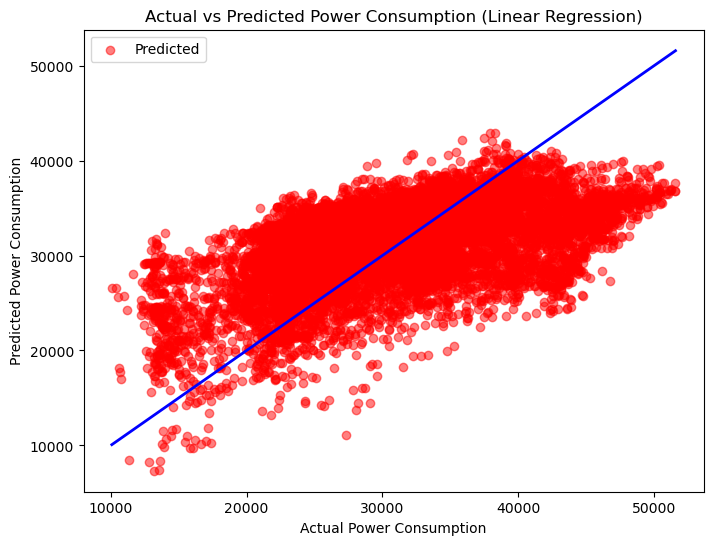

In [68]:
# Visualization of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_pred, color='red', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title(f"Actual vs Predicted Power Consumption ({best_model_name})")
plt.legend()
plt.show()
